# 准备工作
## 准备数据
在准备工作阶段首先应该观察数据，并对数据做一定的处理
### 观察整个数据集

In [1]:
# 导入相关数据包
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./house_price/train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data = data.set_index(['Id'])
x_train, y_train = data.loc[:,:'SaleCondition'], data['SalePrice']

In [5]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

从上面的数据摘要中可以发现`Alley`、`PoolQC`、`Fence`和`MiscFeature`这4个特征缺失了大量数据，出于数据完整性的考虑，为了防止这部分数据影响训练的性能，需剔除这部分特征

### 数值型数据

In [6]:
x_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


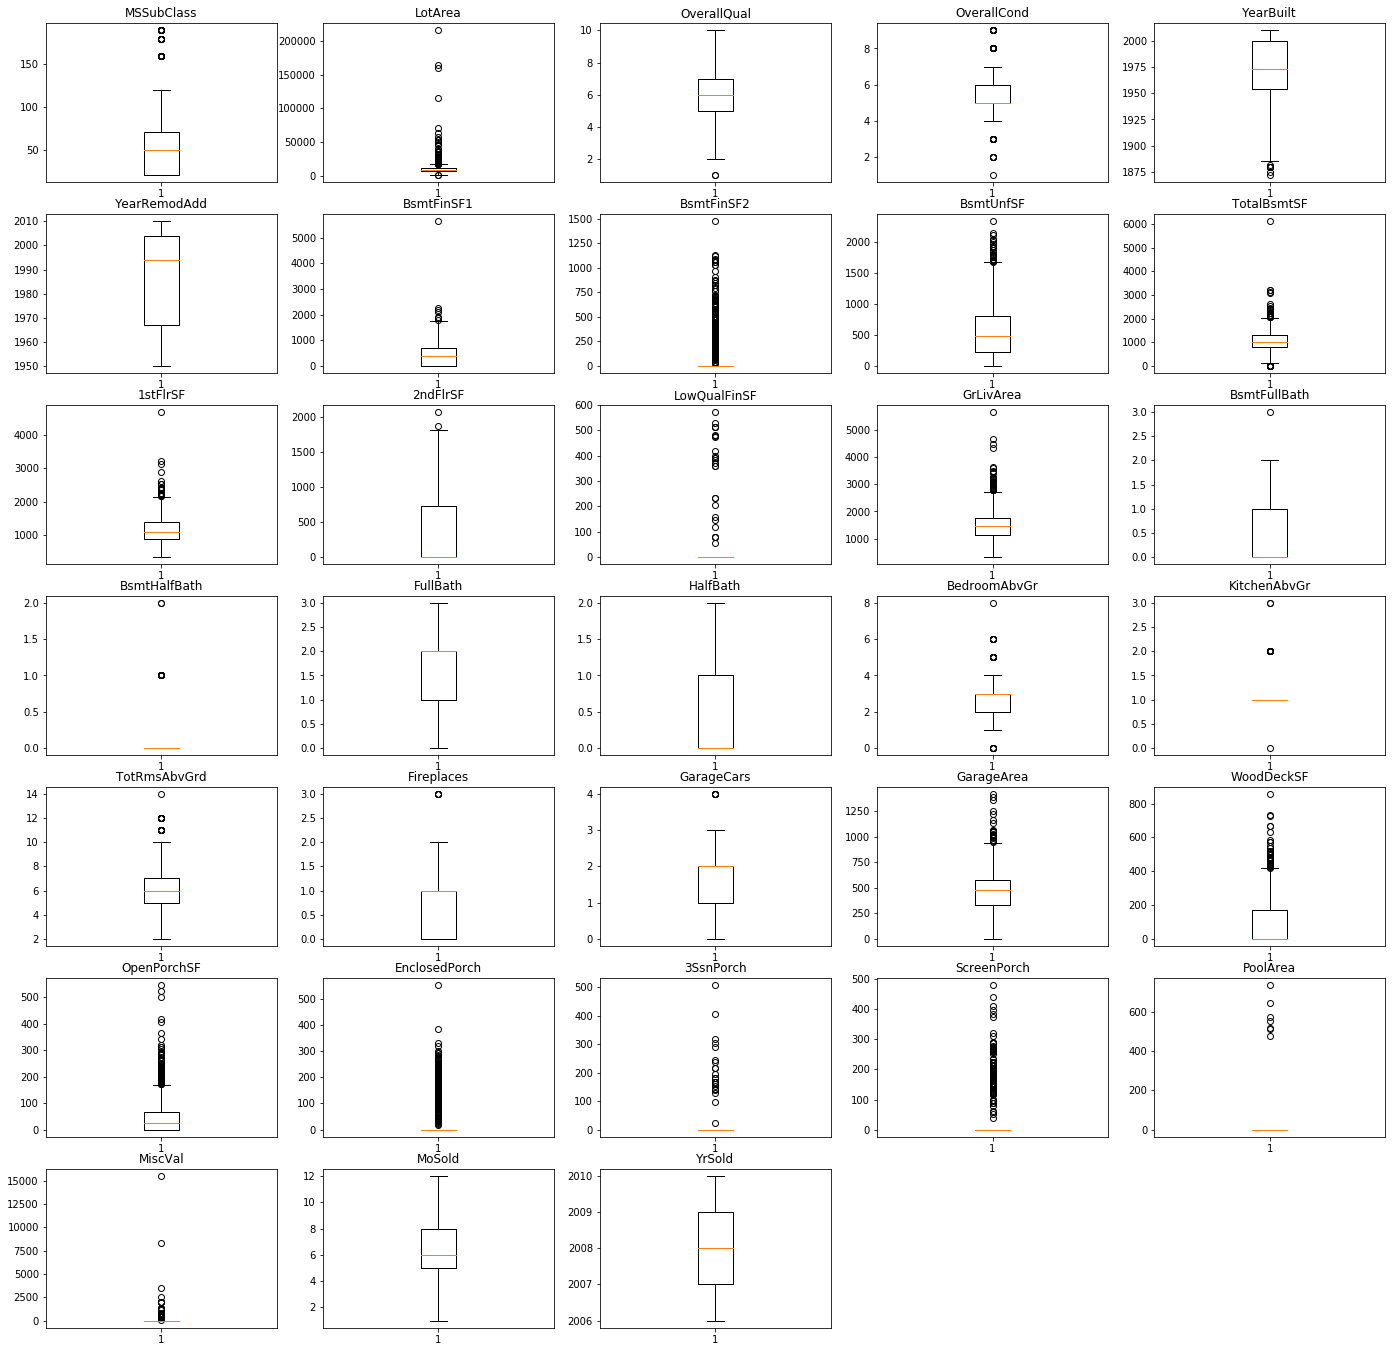

In [7]:
fig = plt.figure(figsize=(24, 24))
count = 1
for x in x_train[x_train.columns[x_train.dtypes == 'int']]:
    ax = fig.add_subplot(7,5, count)
    ax.boxplot(x_train[x])
    ax.set_title(x)
    count += 1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12386fba8>,
      dtype=object)

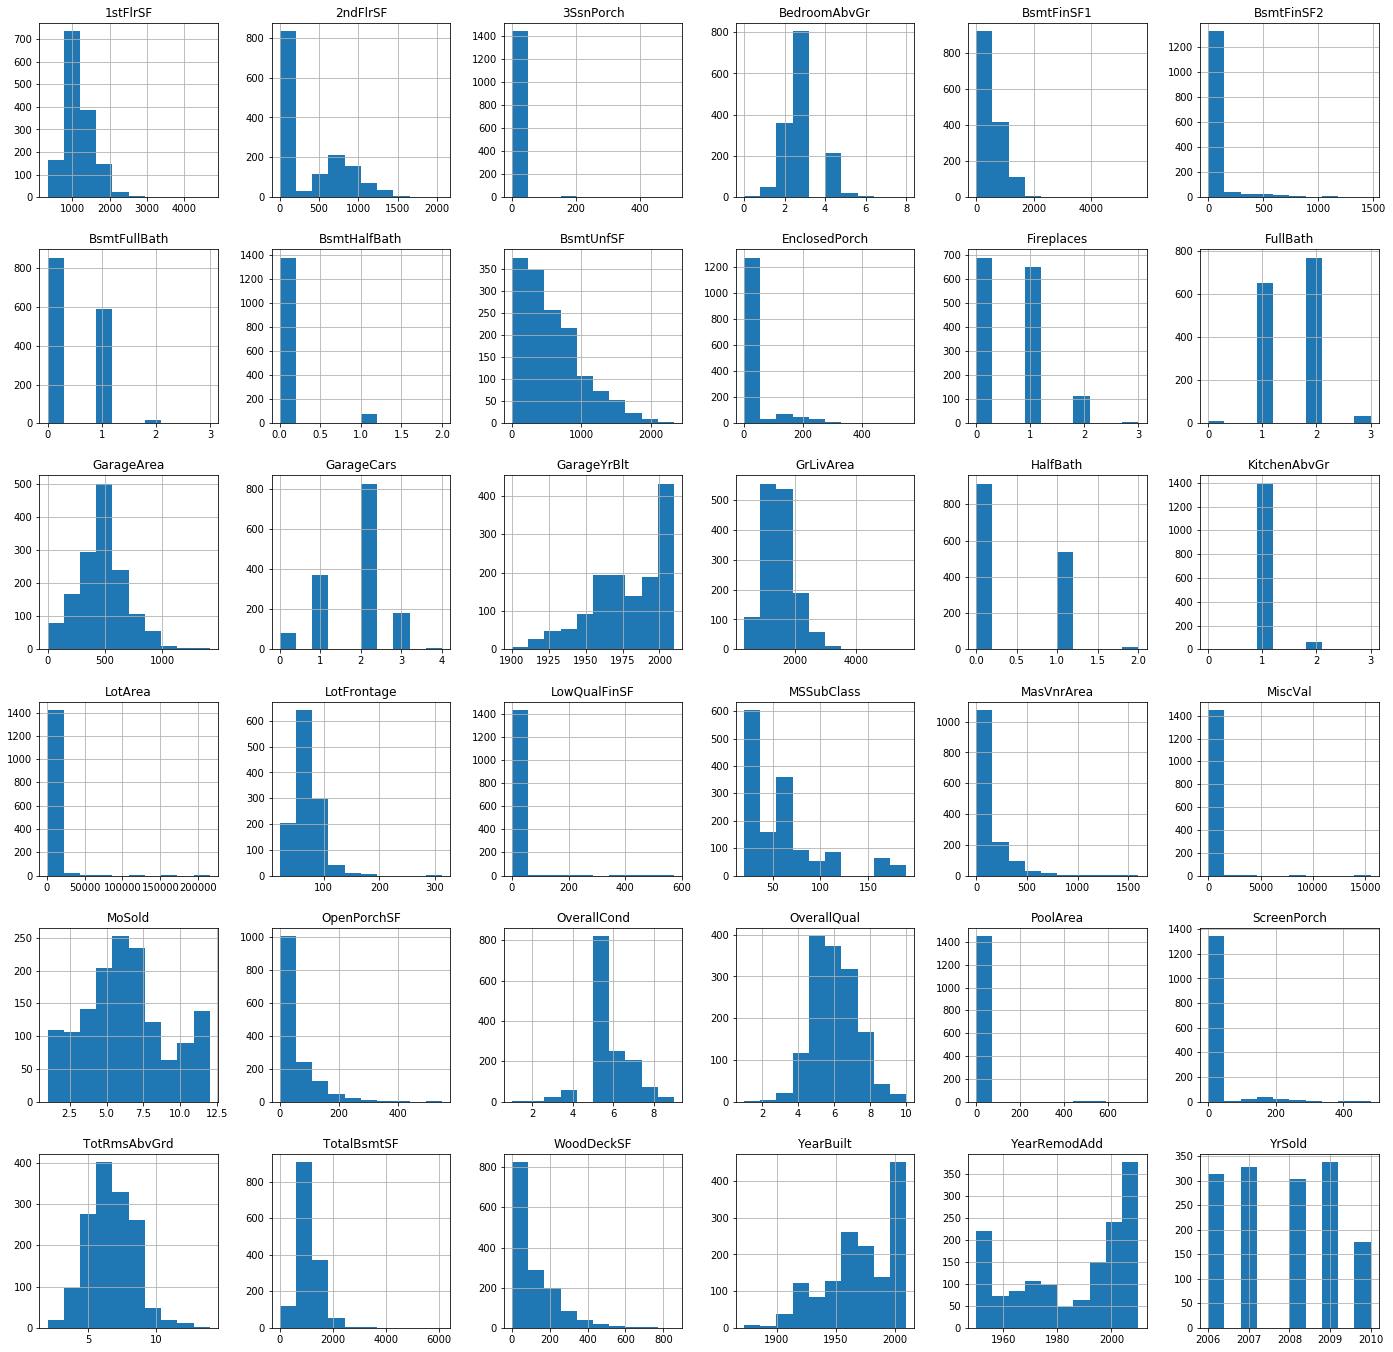

In [8]:
x_train.hist(figsize=(24, 24))

通过对数值型数据的各项指标的描述和直方图可以得出数据分布看出部分数据缺失，如`MSSubClass`、`LotFrontage`等，而大多数数据存在偏斜分布， 如`2ndFlrSF`、`3SsnPorch`等，对于缺失的数据，可以使用中位数进行填充，对于数据分布偏斜的问题，可以通过数据规范化进行调整

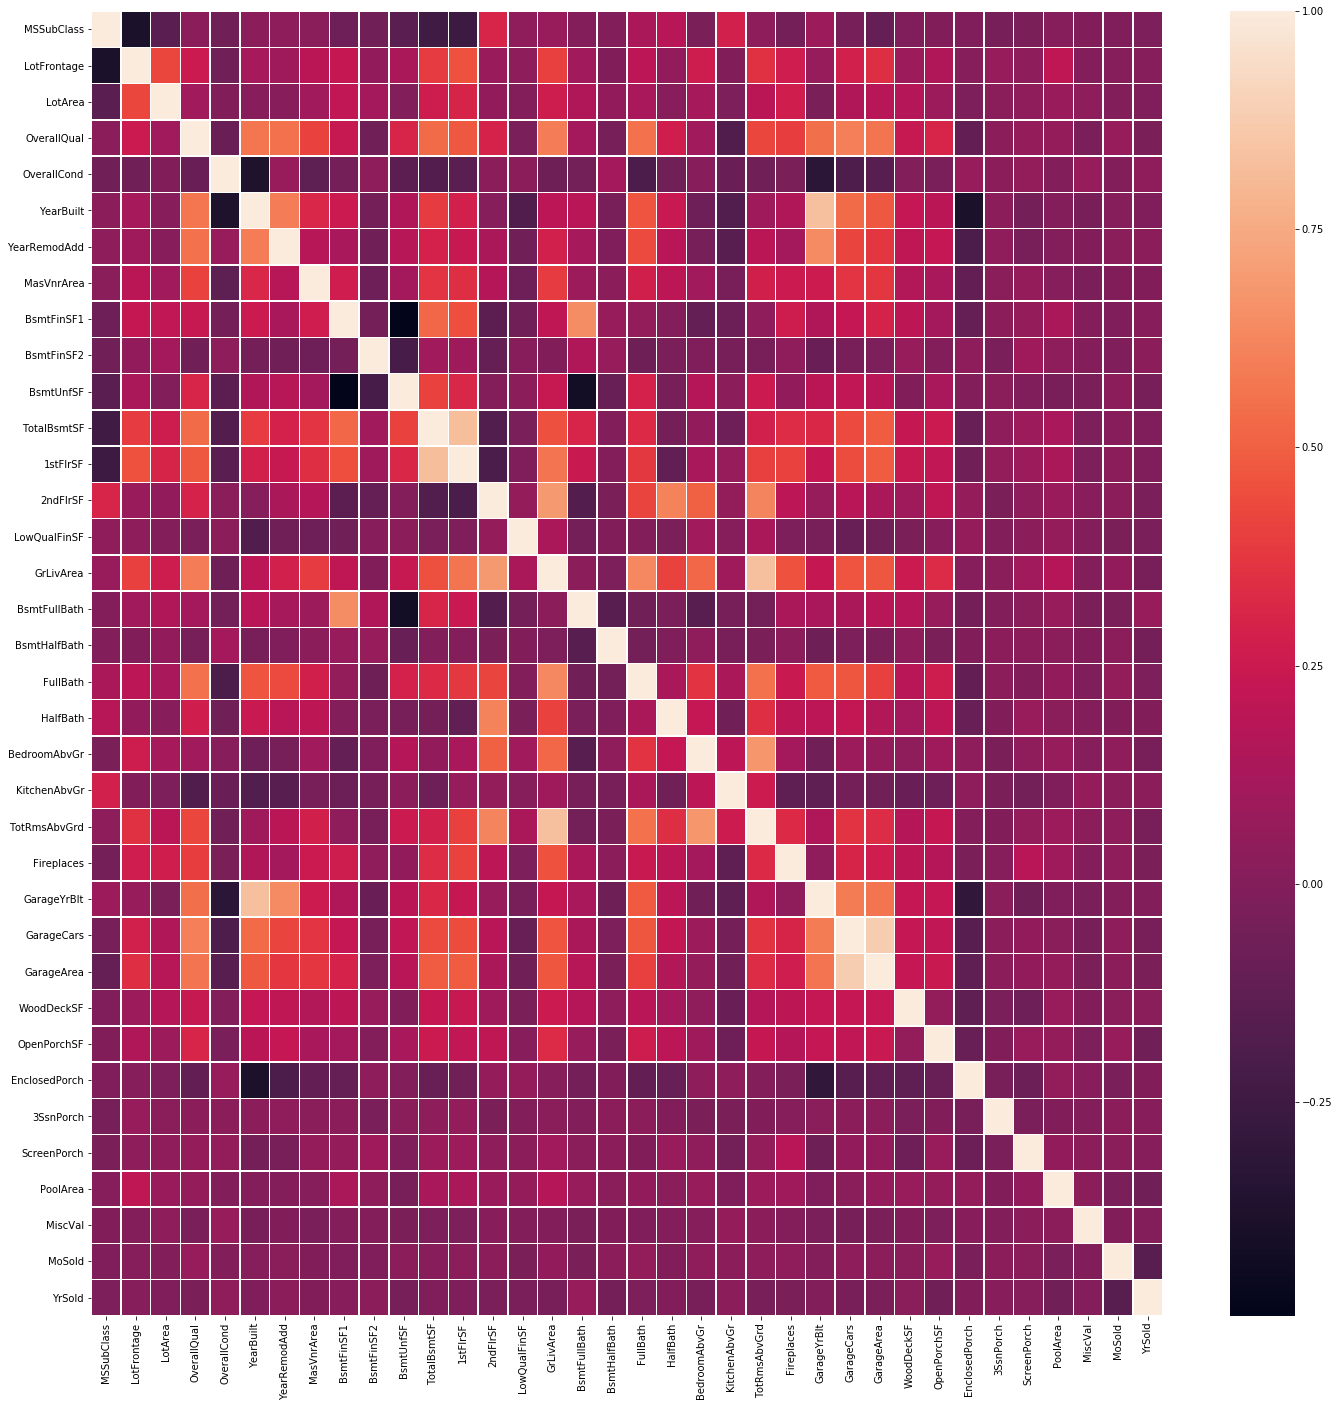

In [9]:
plt.figure(figsize=(24, 24))
sbn.heatmap(x_train.corr(), linewidths=0.5)

### 非数值型数据
数值型数据无论是填充缺失值还是做规整化都是比较容易的，但非数值型数据的分析就稍显复杂了，首先是要确定非数值型数据的取值，然后是明晰每个取值的分布情况，即数量关系

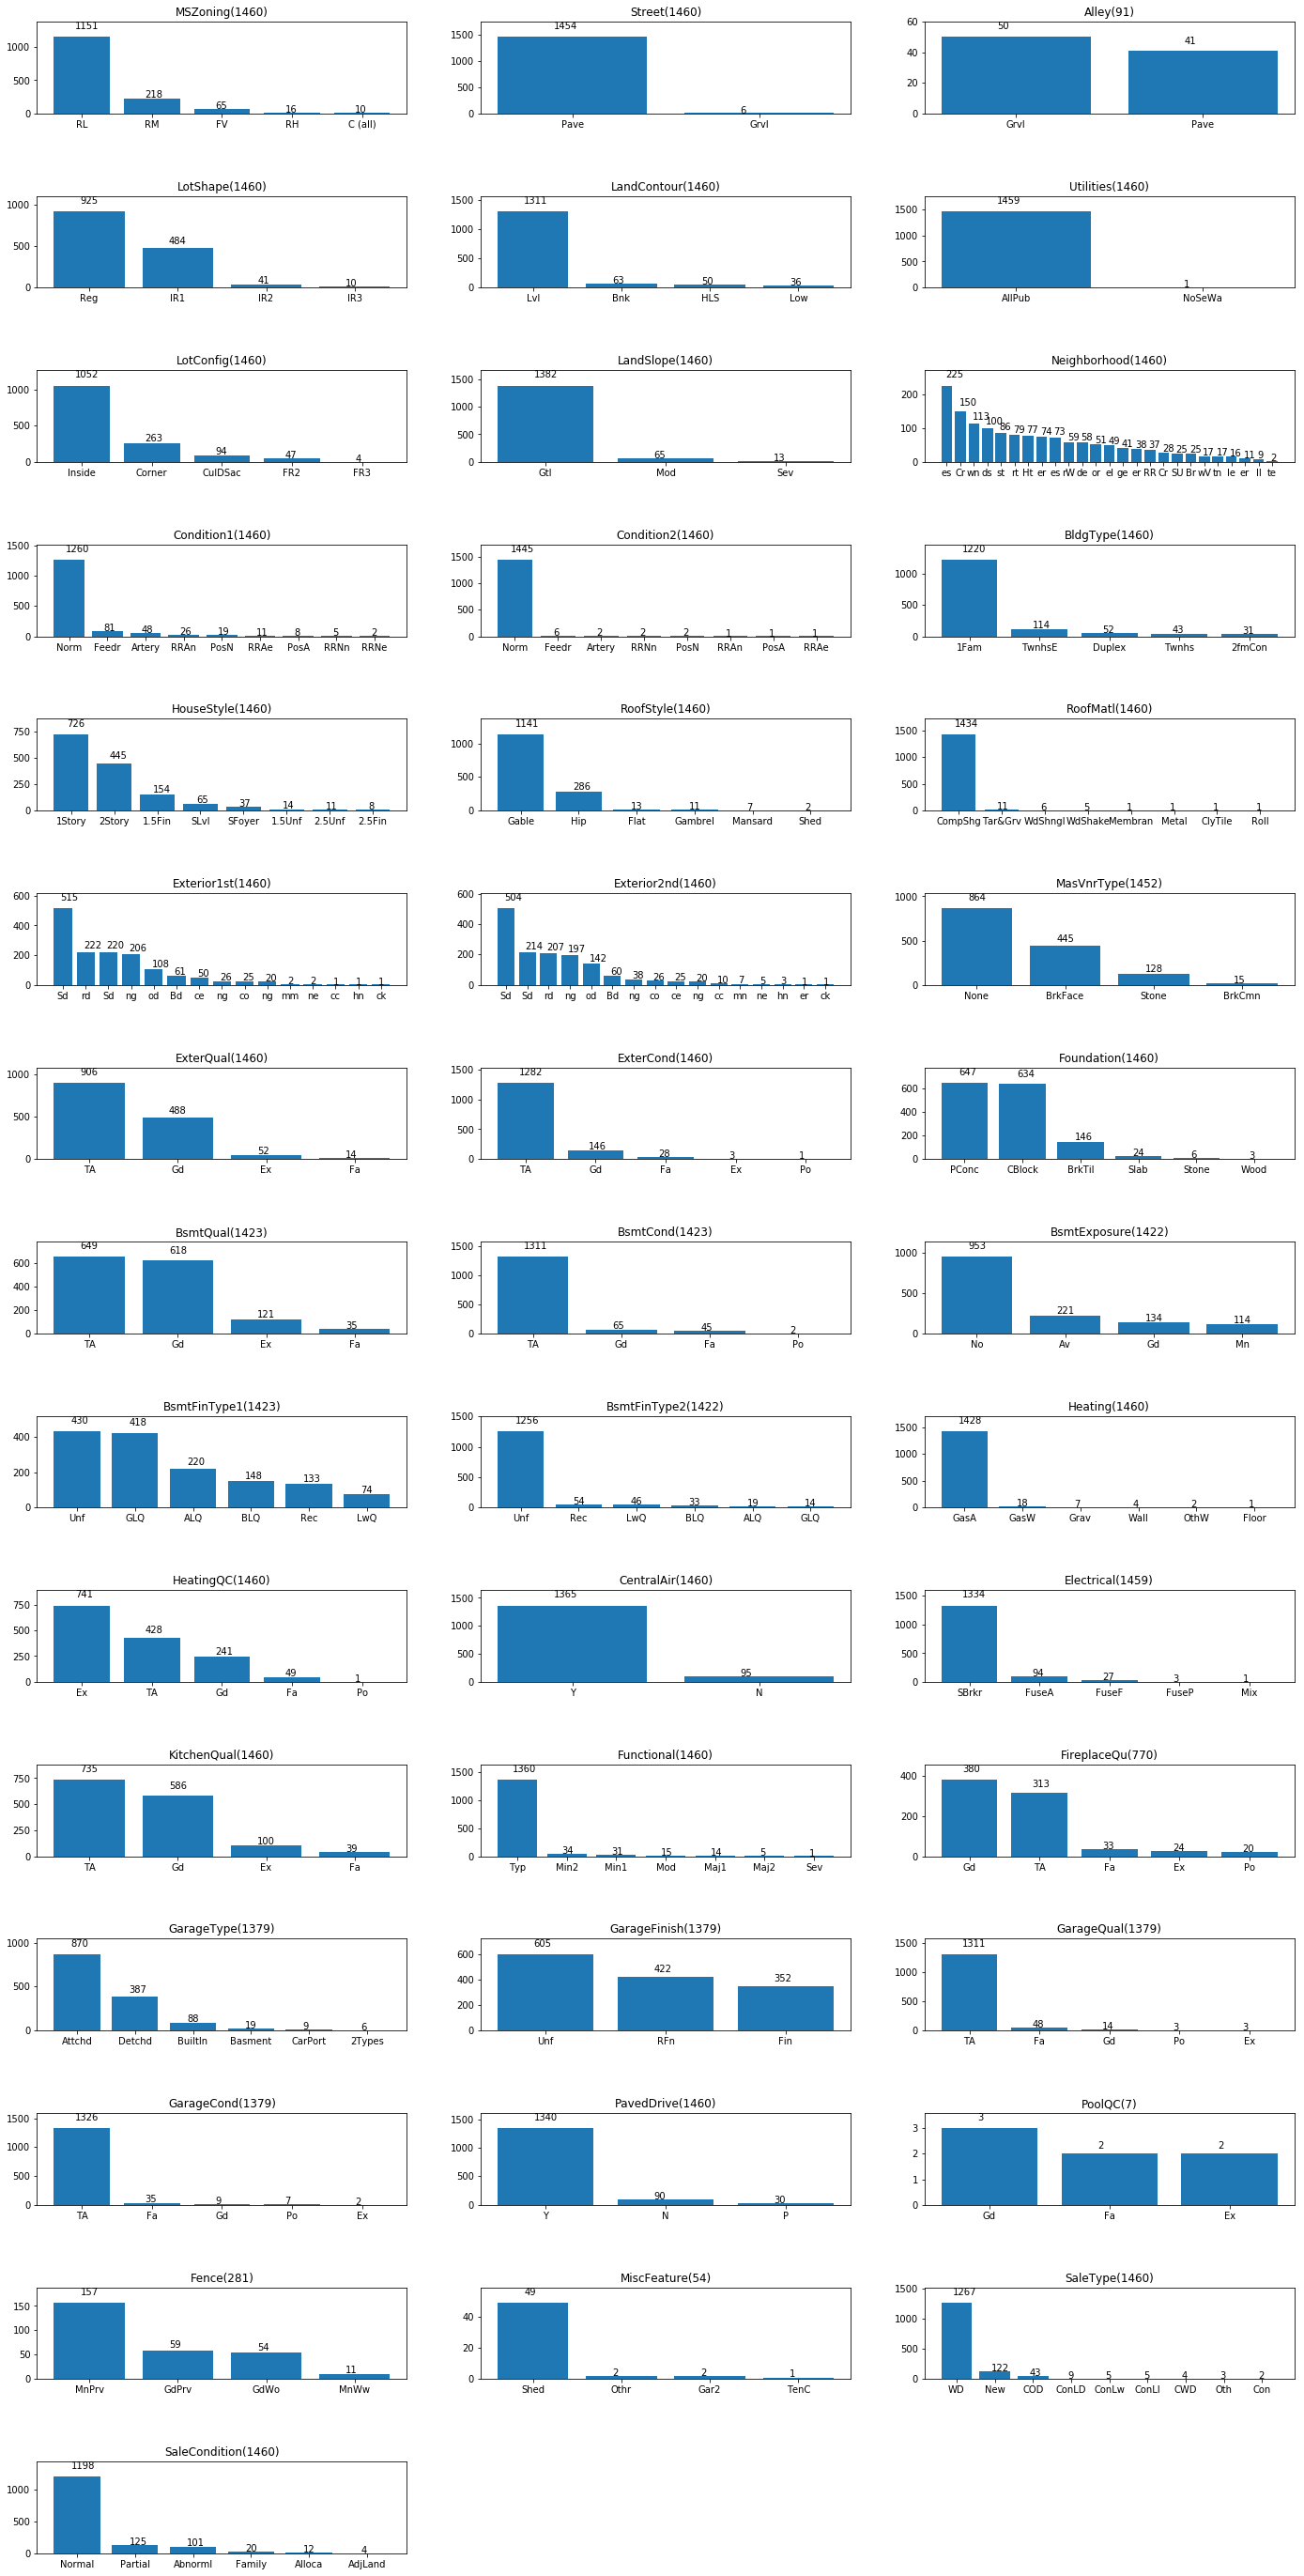

In [10]:
fig = plt.figure(figsize=(24, 48))
count = 1
for x in x_train.columns[x_train.dtypes == 'object']:
    ax = fig.add_subplot(15, 3, count)
    temp_feature = x_train[x].value_counts()
    feature_bar = ax.bar(range(temp_feature.shape[0]), temp_feature.values,  align='center')
    ax.set_xticks(np.arange(temp_feature.shape[0]))
    if temp_feature.shape[0] > 10:
        indexs = [index[-2:] for index in temp_feature.index]
        ax.set_xticklabels(indexs)
    else:
        ax.set_xticklabels(temp_feature.index)
    for bar in feature_bar:
        height = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2-0.1, 1.1*height, str(height))
    ax.set_ylim(0, 1.2 * temp_feature.values[0])
    ax.set_title(x+'('+str(np.sum(temp_feature))+')')
    count+=1
    
plt.subplots_adjust(hspace=0.9, bottom=0.1)

    

通过柱状图可以观测出每个特征的具体数量以及特征中对应类别值的对应分布，从图中发现`Alley`、`PoolQC`、`Fence`和`MiscFeature`存在大量缺失值所以无法进行填充，需要舍弃这部分特征以保持数据的完整性，其它有缺失数据的特征可以使用当前特征中数量最多的类别进行填充

## 处理数据
在这个阶段，结合以上对数据的观察与分析，着手对数据的预处理，包括填充空值，处理类别数据，筛选特征等

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelect(BaseEstimator, TransformerMixin):
    def __init__(self, dtype='int'):
        self.dtype = dtype
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[X.columns[X.dtypes == self.dtype]]
    
class StringImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                        index=X.columns)
        return self
    
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)
    
class DropFeature(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.drop(self.features, axis=1)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
numeric_pipeline = Pipeline([
        ('selector', FeatureSelect()),
        ('impute', SimpleImputer(strategy='median')),
        ('standard', StandardScaler())
])

cat_pipeline = Pipeline([
        ('drop', DropFeature(['Alley','PoolQC', 'Fence', 'MiscFeature'])),
        ('selector', FeatureSelect('object')),
        ('impute', StringImputer()),
        ('oneHot', OneHotEncoder())
])

full_pipeline = FeatureUnion([
        ('numeric_pipeline', numeric_pipeline),
        ('cat_pipeline', cat_pipeline)
])

x_train = full_pipeline.fit_transform(x_train)